# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a model capable of predcting whether or not someone has heart disease based on their medical attributes.

The approach followed will be:
1. Problem definition;
2. Data;
3. Evaluation;
4. Features;
5. Modelling;
6. Experimentation.

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, Is it possible to predict wether or not they have heart disease?

## 2. Data

The original data came from the Creavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease.

There's also a version of it available on Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data.


## 3. Evaluation

As a example (not a actual real case),

> If it's possible to reach 95% accuracy at predicting wether or not a patient has heart disease during the proof of concept, the project can be pursued.

## 4. Features

**Create a data dictionary**

1. age - age in years,
2. sex - (1 = male; 0 = female),
3. cp - chest pain type,
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart,
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease,
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern,
5. chol - serum cholestoral in mg/dl,
    * serum = LDL + HDL + .2 * triglycerides,
    * above 200 is cause for concern,
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
    * '>126' mg/dL signals diabetes,
7. restecg - resting electrocardiographic results,
    * 0: Nothing to note,
    * 1: ST-T Wave abnormality,
        * can range from mild symptoms to severe problems,
        * signals non-normal heart beat,
    * 2: Possible or definite left ventricular hypertrophy,
        * Enlarged heart's main pumping chamber,
8. thalach - maximum heart rate achieved,
9. exang - exercise induced angina (1 = yes; 0 = no),
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more,
11. slope - the slope of the peak exercise ST segment,
    * 0: Upsloping: better heart rate with excercise (uncommon),
    * 1: Flatsloping: minimal change (typical healthy heart),
    * 2: Downslopins: signs of unhealthy heart,
12. ca - number of major vessels (0-3) colored by flourosopy,
    * colored vessel means the doctor can see the blood passing through,
    * the more blood movement the better (no clots),
13. thal - thalium stress result,
    * 1,3: normal,
    * 6: fixed defect: used to be defect but ok now,
    * 7: reversable defect: no proper blood movement when excercising,
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)"

## Preparing the tools

The libraries that'll be used to data analysis and manipulation are: Matplotlib, NumPy.

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data exploration (EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset.

Some checklist to follow:
1. What question(s) are I'm trying to solve?
2. What kind of data do I have and how do I treat different types?
3. What's missing from the data and how will I deal with it?
4. Where are the outliers and why should I care about those?
5. How can I add, change or remove features to get more out of the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# How many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

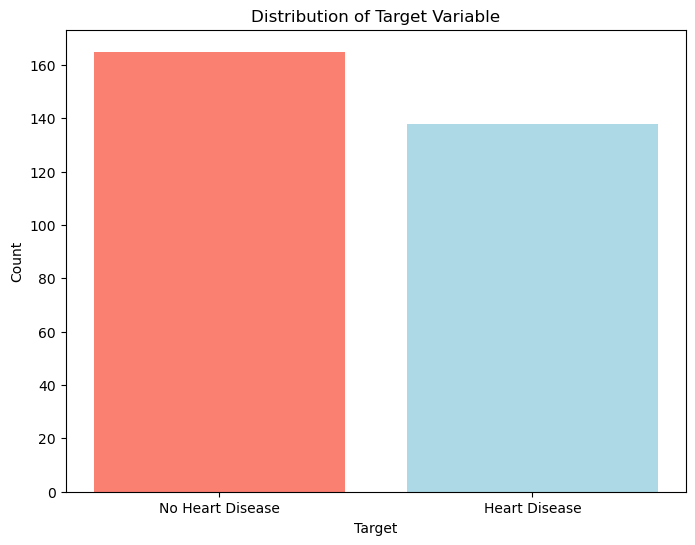

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(["No Heart Disease", "Heart Disease"], 
       df["target"].value_counts(), 
       color=["salmon", "lightblue"])

ax.set(title=("Distribution of Target Variable"), 
       xlabel="Target",
       ylabel="Count")

plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Checking if it has any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare a target column with sex column
ct = pd.crosstab(df.target, df.sex)
ct

sex,0,1
target,,
0,24,114
1,72,93


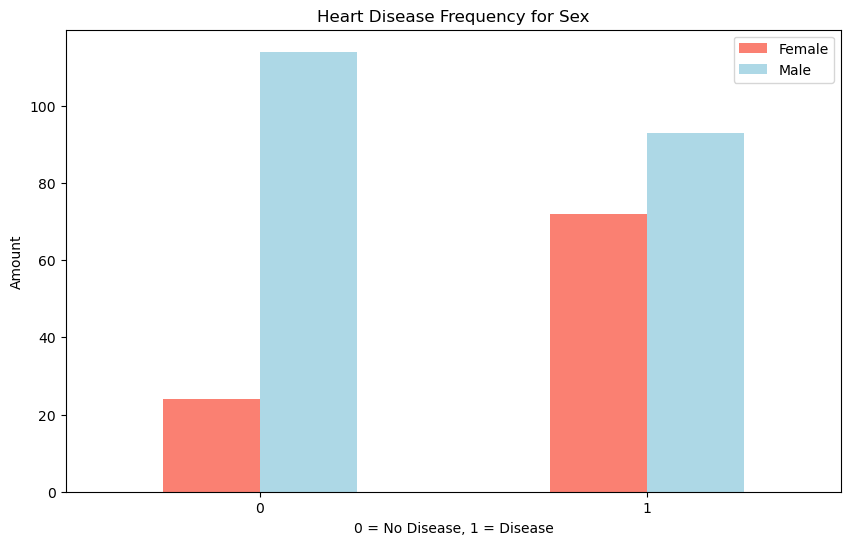

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10, 6), 
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")

plt.legend(["Female", "Male"])

plt.xticks(rotation=0)

plt.show()

### Age vs. Max Heart Rate for Heart Disease

<Figure size 1000x600 with 0 Axes>

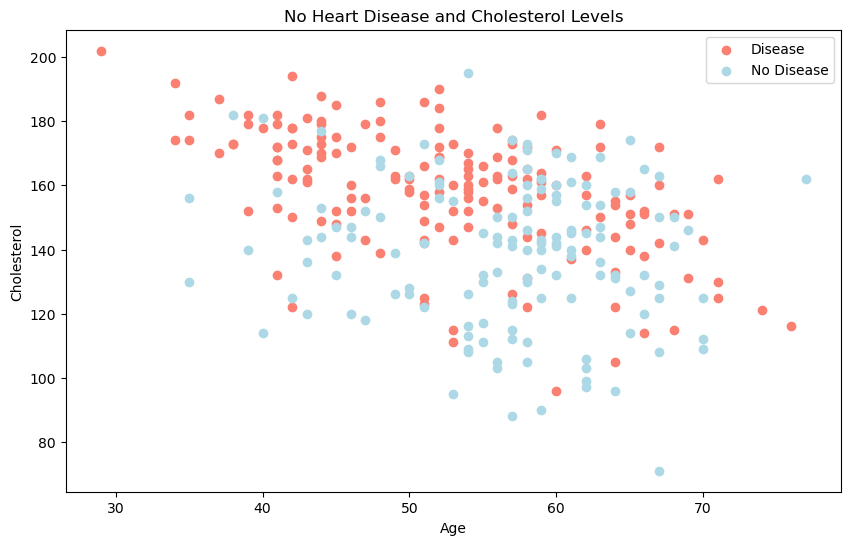

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df.age[df["target"]==1],
           df.thalach[df["target"]==1],
           c="salmon")

ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Scatter with negative examples
ax.scatter(df.age[df["target"]==0],
           df.thalach[df["target"]==0],
           c="lightblue")

ax.set(title="No Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

ax.legend(["Disease", "No Disease"])

plt.show()

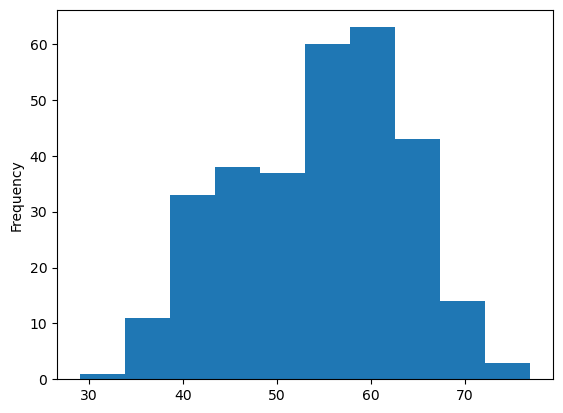

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

### Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type,
    * 0: Typical angina: chest pain related decrease blood supply to the heart,
    * 1: Atypical angina: chest pain not related to heart,
    * 2: Non-anginal pain: typically esophageal spasms (non heart related),
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


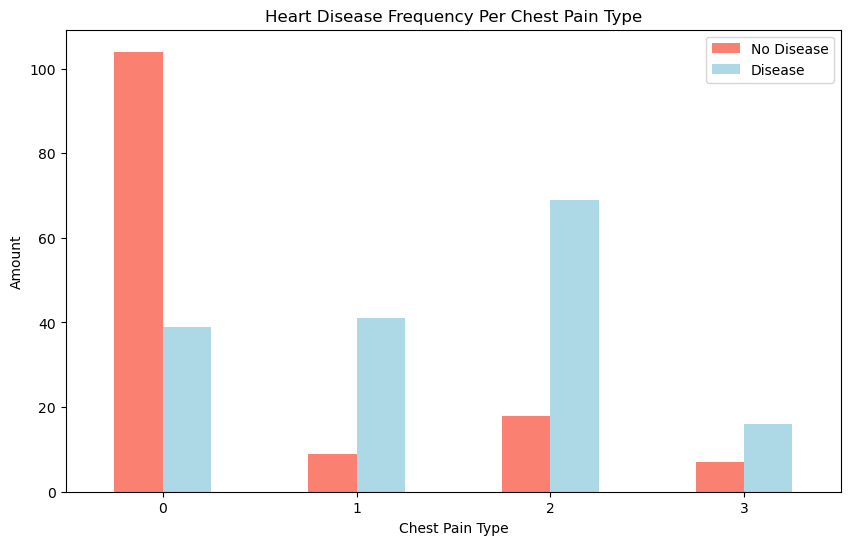

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")

plt.legend(["No Disease", "Disease"])

plt.xticks(rotation=0)

plt.show()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


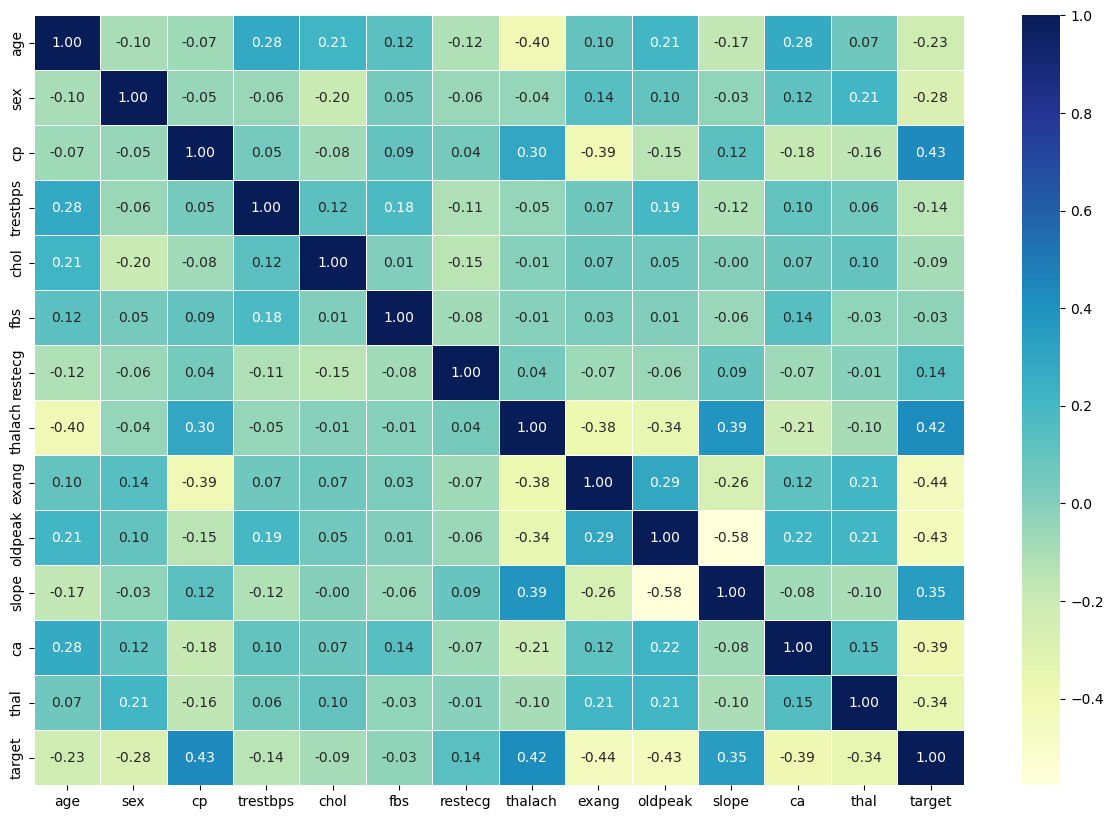

In [19]:
# Make correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

plt.show()

## 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now with the data splitted into train and test sets, I can start to build the model. The training test will serve to learn patterns in the data, and the test data will be used to predict on unseen data.

Three models will be used:
1. Logistic Regression;
2. K-Nearest Neighbours Classifier;
3. Random Forest Classifier.

In [27]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/home/shuruyi/Documents/git/heart-disease-detection/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

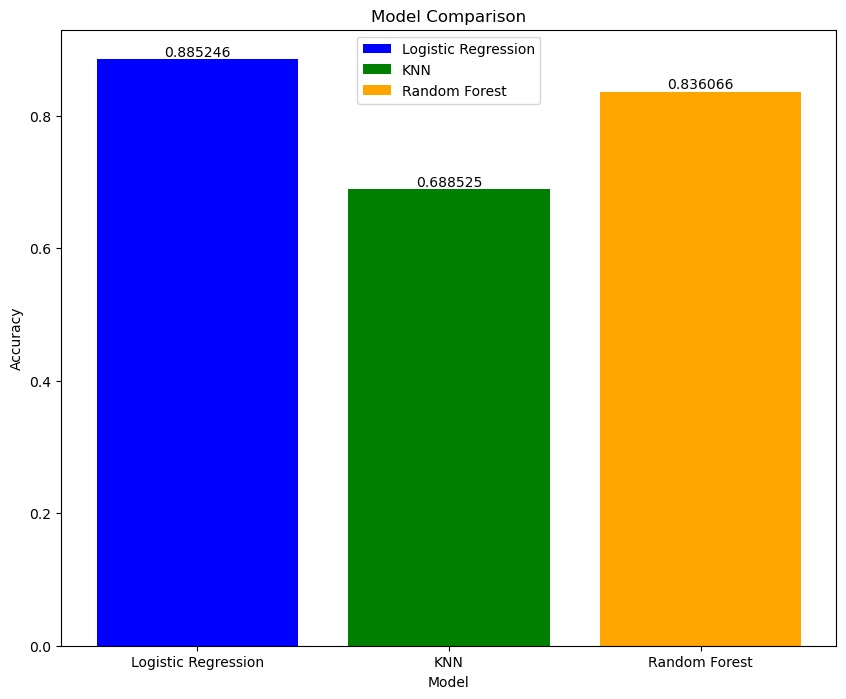

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(model_compare.columns, 
       model_compare.values[0],
       color=["blue", "green", "orange"],
       label=model_compare.columns)

ax.set(title="Model Comparison", 
       xlabel="Model", 
       ylabel="Accuracy")

for i in ax.containers:
    ax.bar_label(i)

ax.legend()

plt.show()

Now that I already have a baseline model, there some step that can be look.

* Hyperparameter tuning;
* Feature importance;
* Confusion matrix;
* Cross-validation;
* Precision;
* Recall;
* F1 Score;
* Classification report;
* ROC curve;
* AUC.

### Hyperparameter tuning (by hand)

Maximum KNN score on the test data: 75.41%


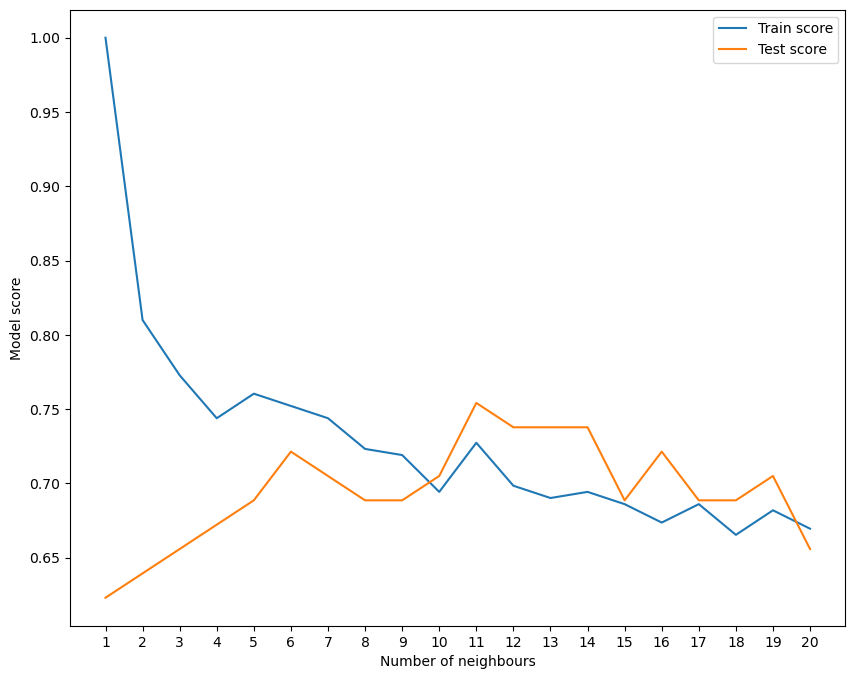

In [30]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n neighbours
neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(neighbours, train_scores, label="Train score")
ax.plot(neighbours, test_scores, label="Test score")
ax.set(xlabel="Number of neighbours", ylabel="Model score")
ax.legend()

plt.xticks(np.arange(1, 21, 1))
plt.show()

## Hyperparameter tuning with RandomizedSearchCV

I'm going to tune: 
* LogisticRegression();
* RandomFOrestClassifier().

Using RandomizedSearchCV() function.

In [31]:
# Hyperparameter grid for LinearRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

With the above hyperparameter grids, I can now tune our models using RandomizedSearchCV.

In [32]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [35]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since LogisticRegression is the best model, let's use GridSearchCV to tune it even more.

In [39]:
log_red_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_red_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating the tuned ml classifier, beyong accuracy

* ROC curve and AUC curve;
* Confusion Matrix;
* Classification report;
* Precision;
* Recall;
* F1-Score.

Using cross-validation when its possible.

In [43]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

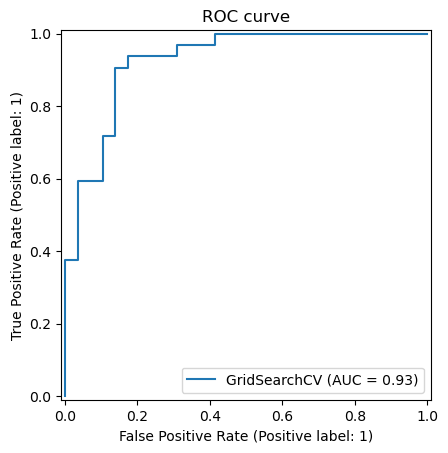

In [48]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
disp.ax_.set_title("ROC curve")

plt.show()

In [62]:
import seaborn as sns
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    
    plt.title("Confusion matrix")
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

    plt.show()

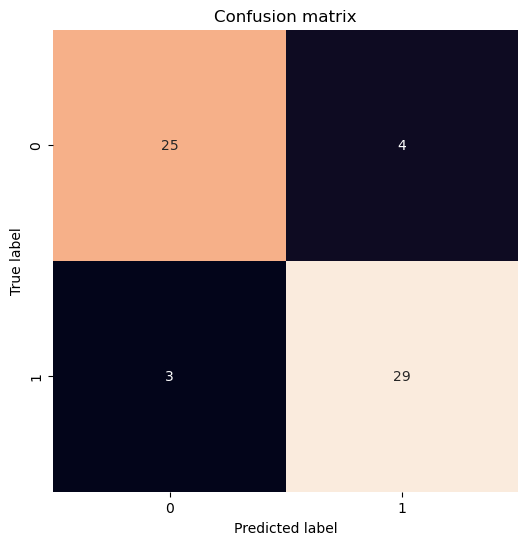

In [63]:
plot_conf_mat(y_test, y_preds)

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics uisng cross-validation
The next section will calculate accuracy, precision, recall and f1-score using `cross-validation score`.

In [65]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [72]:
np.random.seed(42)

In [73]:
cv_acc = cross_val_score(clf, X_train, y_train,
                         cv=5,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8305272108843538

In [74]:
cv_prec = cross_val_score(clf, X_train, y_train,
                          cv=5,
                          scoring="precision")

cv_prec = np.mean(cv_prec)
cv_prec

0.8156825852946541

In [75]:
cv_recall = cross_val_score(clf, X_train, y_train,
                            cv=5,
                            scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.8945868945868944

In [76]:
cv_f1 = cross_val_score(clf, X_train, y_train,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8527860395821953

In [79]:
df_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

df_metrics

,Accuracy,Precision,Recall,F1
0,0.830527,0.815683,0.894587,0.852786


In [82]:
df_metrics.values

array([[0.83052721, 0.81568259, 0.89458689, 0.85278604]])

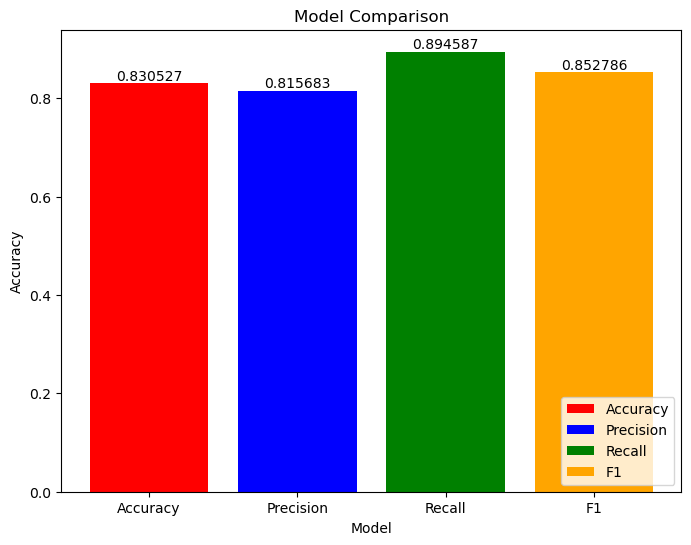

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df_metrics.columns, df_metrics.values[0],
        color=["red", "blue", "green", "orange"],
        label=df_metrics.columns)

ax.set(title="Model Comparison",
       xlabel="Model",
       ylabel="Accuracy")

for i in ax.containers:
    ax.bar_label(i)

ax.legend(loc="lower right")

plt.show()

### Feature Importance

Which features contributed most to the outcomes of the model?

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [101]:
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [102]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

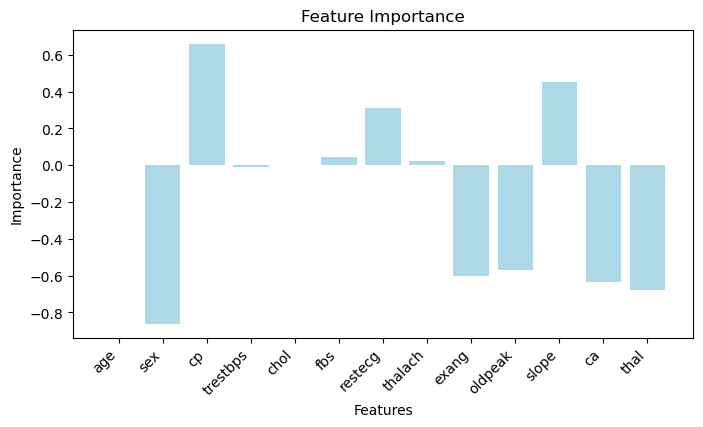

In [108]:
feature_dict = pd.DataFrame(feature_dict, index=[0])

fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(feature_dict.columns, feature_dict.values[0],
        color=["lightblue"])

ax.set(title="Feature Importance",
       xlabel="Features",
       ylabel="Importance")

plt.xticks(rotation=45, ha="right")

plt.show()

## 6. Experimentation

* Its possible to collect more data?
* Could I try a better model?
* Could the current models be improved?

I'll try to test some XGBoost, because it tends to get better results.

In [110]:
import xgboost as xgb

In [111]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_test, y_test)

0.819672131147541

The base model doenst have better results than the LogisticRegression, lets try to tune its hyperparameters.